In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [93]:
deer_dir = '/content/drive/MyDrive/Politechnika/Magisterka/dataset/dataset_1.0/deer'
wild_boar_dir = '/content/drive/MyDrive/Politechnika/Magisterka/dataset/dataset_1.0/wild_boar'
new_ann_dir = '/content/drive/MyDrive/Politechnika/Magisterka/dataset/dataset_ultralytics_1.0/annotations'
new_images_dir = '/content/drive/MyDrive/Politechnika/Magisterka/dataset/dataset_ultralytics_1.0/images'
ultralytics_dir = '/content/drive/MyDrive/Politechnika/Magisterka/dataset/dataset_ultralytics_1.0'

In [7]:
%pip install xmltodict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [118]:
def bndbox2Yolo_format(bndbox:dict, width:int, height:int):
    x_min, y_min, x_max, y_max = int(bndbox['xmin']), int(bndbox['ymin']),\
                                 int(bndbox['xmax']), int(bndbox['ymax'])
    X, Y = (x_min + (x_max- x_min)/2)/width, (y_min  +(y_max-y_min)/2)/height
    width_, height_ = (x_max - x_min)/width, (y_max - y_min)/height
    return X, Y, width_, height_

In [132]:
def class2Yolo_format(class_name:str):
  if class_name == 'deer' or class_name == 'roe_deer':
    return 0
  elif class_name == 'wild_boar':
    return 1
  else:
    raise ValueError

In [137]:
import xmltodict
def xml2Yolo_format(file_name:str):
  with open(f'{file_name}', 'r', encoding='utf-8') as file:
      xml = file.read()
  xml_dict = xmltodict.parse(xml)
  width = int(xml_dict['annotation']['size']['width'])
  height = int(xml_dict['annotation']['size']['height'])
  if type(xml_dict['annotation']['object']) == list:
    objects = [(class2Yolo_format(object_['name']), bndbox2Yolo_format(object_['bndbox'], width, height))\
              for object_ in xml_dict['annotation']['object']]
  else:
    objects = [(class2Yolo_format(xml_dict['annotation']['object']['name']),\
                bndbox2Yolo_format(xml_dict['annotation']['object']['bndbox'], width, height))]    
  final_str = ''
  
  for object_ in objects:
    final_str += str(object_[0])
    for i in range(4):
      final_str += (' ' + str(object_[1][i]))
    final_str += '\n'
  return final_str[:-1]

In [134]:
xml2Yolo_format('/content/drive/MyDrive/Politechnika/Magisterka/dataset/dataset_1.0/deer/xml/deer_000186.xml')

0


'0 0.5133928571428571 0.42953020134228187 0.17410714285714285 0.10738255033557047'

In [50]:
import os
images_deer = sorted(os.listdir(deer_dir + '/photo'))
images_wild_boar = sorted(os.listdir(wild_boar_dir + '/photo'))
ann_deer = sorted(os.listdir(deer_dir + '/xml'))
ann_wild_boar = sorted(os.listdir(wild_boar_dir + '/xml'))

In [139]:
from shutil import copyfile
ann_no = len(os.listdir(new_ann_dir))
img_no = len(os.listdir(new_images_dir))
print(ann_no, img_no)
if ann_no != img_no:
  raise ValueError('[ERROR]: Not equal image and annotation number!')
else:
  print(f'[INFO]: Current dataset has {img_no} objects')
i = img_no
for ann, img in zip(ann_deer, images_deer):
  file_name = str(i).zfill(4)
  yolo_str = xml2Yolo_format(deer_dir + f'/xml/{ann}')
  with open(new_ann_dir + f'/{file_name}.txt', 'w') as f:
    f.write(yolo_str)
  copyfile(deer_dir + f'/photo/{img}', new_images_dir + f'/{file_name}.jpg')
  print(f'[INFO]: Annotation file {ann} and {img} copied succesfully to {file_name}.txt and {file_name}.jpg!')
  i += 1
  

68 68
[INFO]: Current dataset has 68 objects
[INFO]: Annotation file deer_000001.xml and deer_000001.jpg copied succesfully to 0068.txt and 0068.jpg!
[INFO]: Annotation file deer_000002.xml and deer_000002.jpg copied succesfully to 0069.txt and 0069.jpg!
[INFO]: Annotation file deer_000003.xml and deer_000003.jpg copied succesfully to 0070.txt and 0070.jpg!
[INFO]: Annotation file deer_000004.xml and deer_000004.jpg copied succesfully to 0071.txt and 0071.jpg!
[INFO]: Annotation file deer_000005.xml and deer_000005.jpg copied succesfully to 0072.txt and 0072.jpg!
[INFO]: Annotation file deer_000006.xml and deer_000006.jpg copied succesfully to 0073.txt and 0073.jpg!
[INFO]: Annotation file deer_000007.xml and deer_000007.jpg copied succesfully to 0074.txt and 0074.jpg!
[INFO]: Annotation file deer_000008.xml and deer_000008.jpg copied succesfully to 0075.txt and 0075.jpg!
[INFO]: Annotation file deer_000009.xml and deer_000009.jpg copied succesfully to 0076.txt and 0076.jpg!
[INFO]: An

0
0


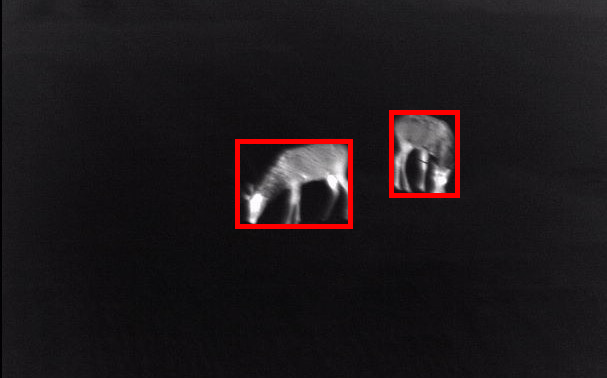

In [142]:
from PIL import Image, ImageDraw

def show_bbox(image_path):
    # convert image path to label path
    label_path = image_path.replace('/images/', '/annotations/')
    label_path = label_path.replace('.jpg', '.txt')

    # Open the image and create ImageDraw object for drawing
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)

    with open(label_path, 'r') as f:
        for line in f.readlines():
            # Split the line into five values
            label, x, y, w, h = line.split(' ')
            print(label)

            # Convert string into float
            x = float(x)
            y = float(y)
            w = float(w)
            h = float(h)

            # Convert center position, width, height into
            # top-left and bottom-right coordinates
            W, H = image.size
            x1 = (x - w/2) * W
            y1 = (y - h/2) * H
            x2 = (x + w/2) * W
            y2 = (y + h/2) * H

            # Draw the bounding box with red lines
            draw.rectangle((x1, y1, x2, y2),
                           outline=(255, 0, 0), # Red in RGB
                           width=5)             # Line width
    image.show()
    

show_bbox('/content/drive/MyDrive/Politechnika/Magisterka/dataset/dataset_ultralytics_1.0/images/0135.jpg')

In [145]:
import random

files = [name[:-4] for name in os.listdir(new_images_dir)]
random.shuffle(files)
train = files[:int(len(files) * 0.7)]
val = files[int(len(files) * 0.7) + 1:int(len(files) * 0.85)]
test = files[int(len(files) *0.85) + 1:]


In [144]:
%%bash
find /content/drive/MyDrive/Politechnika/Magisterka/dataset/dataset_ultralytics_1.0/data/images -type f -name '*.jpg' -delete
find /content/drive/MyDrive/Politechnika/Magisterka/dataset/dataset_ultralytics_1.0/data/labels -type f -name '*.txt' -delete

In [146]:
for file in train:
  copyfile(new_images_dir + f'/{file}.jpg', ultralytics_dir + f'/data/images/train/{file}.jpg')
  copyfile(new_ann_dir + f'/{file}.txt', ultralytics_dir + f'/data/labels/train/{file}.txt')
for file in test:
  copyfile(new_images_dir + f'/{file}.jpg', ultralytics_dir + f'/data/images/test/{file}.jpg')
  copyfile(new_ann_dir + f'/{file}.txt', ultralytics_dir + f'/data/labels/test/{file}.txt')
for file in val:
  copyfile(new_images_dir + f'/{file}.jpg', ultralytics_dir + f'/data/images/val/{file}.jpg')
  copyfile(new_ann_dir + f'/{file}.txt', ultralytics_dir + f'/data/labels/val/{file}.txt')

In [152]:
%%bash
cd /content/drive/MyDrive/Politechnika/Magisterka/dataset/dataset_ultralytics_1.0
rm ./data.zip
zip -r ./data.zip ./data
cd /

  adding: data/ (stored 0%)
  adding: data/images/ (stored 0%)
  adding: data/images/train/ (stored 0%)
  adding: data/images/train/0069.jpg (deflated 5%)
  adding: data/images/train/0045.jpg (deflated 3%)
  adding: data/images/train/0121.jpg (deflated 2%)
  adding: data/images/train/0110.jpg (deflated 2%)
  adding: data/images/train/0188.jpg (deflated 2%)
  adding: data/images/train/0102.jpg (deflated 3%)
  adding: data/images/train/0036.jpg (deflated 2%)
  adding: data/images/train/0079.jpg (deflated 2%)
  adding: data/images/train/0015.jpg (deflated 2%)
  adding: data/images/train/0143.jpg (deflated 3%)
  adding: data/images/train/0186.jpg (deflated 7%)
  adding: data/images/train/0243.jpg (deflated 1%)
  adding: data/images/train/0224.jpg (deflated 1%)
  adding: data/images/train/0002.jpg (deflated 5%)
  adding: data/images/train/0205.jpg (deflated 2%)
  adding: data/images/train/0046.jpg (deflated 2%)
  adding: data/images/train/0208.jpg (deflated 1%)
  adding: data/images/train/0